# Sect 31: Intro to Time Series

## Learning Objectives:
- Learn how to load in timeseries data into pandas
- Learn how to plot timeseries in pandas
- Learn how to resample at different time frequencies
- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition

 ## Questions to Revisit
 - Can you interpolate between missing datapoints?
 

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

**REFERENCE CONTENTS:**
- Date StrFormatting
    - Used for:
        - Recognizing Date Formats (`pd.to_datetime`)
        - `dt_obj.strftime()`
        
- Pandas Frequency Aliases
    - Used for:
        - `df.resample()`
        - `df.asfreq()`
        - ...
        

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

### Pandas Frequency Aliases


In [12]:
# !pip install -U fsds_100719
# # !pip install -U scikit-learn

# from fsds_100719.imports import *

In [11]:
# # aliases = pd.read_clipboard(sep='|')

# # # [aliases.drop(columns=[col],inplace=True) for col in aliases.columns if 'Unnamed' in col]
# # aliases.drop(columns=[col for col in aliases.columns if "Un" in col])
# # if aliases is not None:
# #     aliases.to_csv('freq_aliases_.csv')
# aliases = pd.read_csv('freq_aliases.csv')
# aliases

In [13]:
# aliases = pd.read_clipboard(sep='|',usecols=['Alias\t','Description'])
# aliases

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

# Intro to Time Series

In [ ]:
df = fs.datasets.load_mod1_proj()
df.head()

In [ ]:
df.info()

In [ ]:
date = pd.to_datetime(df['date'])
date

In [ ]:
df['d_date'] = pd.to_datetime(df['date'])
display(df.head())
df.dtypes

In [ ]:
df.set_index('d_date',inplace=True)
df.index

In [ ]:
mpl.rcParams['figure.figsize'] = (12,6)

In [ ]:
df['price'].plot()

### Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.loc['2014-05-01':'2015-05-01','price'].plot().autoscale(axis='x',tight=True)

## Time series Frequencies


In [ ]:
df.index

In [ ]:
df.index

In [ ]:
ts = df['price']

In [ ]:
freq_codes = ['D','3D','W','M', 'Q']
for freq in freq_codes:
    plt.figure()
    title=f"Freq Code: {freq}"
    plt.legend()
    ts.resample(freq).mean().plot(title=title)
    
ax = ts.resample('M').mean().plot(kind='bar')

In [ ]:
ts.resample('D').mean().plot()

## Using Datetime objects and apply statemements

In [ ]:
display(df.head())
df.dtypes

In [ ]:
t = df.index.to_series()[0]
display(t)
print(t)

In [ ]:
# help(t.strptime)

In [ ]:
print(t.strftime("%m-%d-%Y"))
print(t.strftime("%T"))

In [ ]:
df.index

In [ ]:
df['month'] = df.index.to_series().apply(lambda x: x.month)
df.head()


In [ ]:
## Let's make a month column to groupby
df['month_int'] = df.index.to_series().apply(lambda x: x.month) #x
df['month_name'] =df.index.to_series().apply(lambda x:x.strftime("%B"))

for col in ['month_int','month_name']:
    display(df[col].value_counts(normalize=True))

In [ ]:
url = "https://en.wikipedia.org/wiki/2015_Baltimore_protests"
pre_riot = crime_2014.loc['2015':'2016']
pre_riot

In [ ]:
df.index.to_series().apply(lambda x: x.month)

In [ ]:
help(ax.xaxis.set_ticklabels)

In [ ]:
fig = ax.get_figure()

ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(),**{'rotation':45,
                                                    'ha':'right'}) 
fig

In [ ]:
# df.resample('D').fillna(method='ffill')

In [ ]:
# df.loc['2014-05-01':]['price'].plot()#,'price']

In [ ]:
# df['price'].hist(bins='auto')

## Time Series Calculations


### Rolling Statistics

In [ ]:
ts_mean = ts.resample('D').mean()
ts_mean.rolling(window=7).mean().head(20)
ts_mean.plot()

In [ ]:
plt.figure(figsize=(12,12))
ts_mean = ts.resample('D').mean()
ts_mean.plot(label='Day')

ts_mean.rolling(window=7).mean().plot(label='Rolling Mean')
ts_mean.rolling(window=7).std().plot(label='Rolling Std')

plt.legend()

In [ ]:
ts_mean.fillna(method='ffill',inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts_mean)#.fillna(method='ffill'))


In [ ]:
## Lab Function
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    print (dfoutput)
    
    return dfoutput

In [ ]:
stationarity_check(ts_mean);

In [ ]:
ts_cleaned = ts_mean-ts_mean.rolling(7).mean()
ts_mean.plot()
ts_cleaned.plot()

## Time Series Trends

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-online-ds-ft-100719/master/images/new_trendseasonal.png" width=50%>

### Stationarity

<div style="text-align:center;font-size:2em">Mean</div>
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_mean_nonstationary.png" width=70%>
<br><br>
<div style="text-align:center;font-size:3em">Variance</div>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_cov_nonstationary.png" width=70%>
</div>

### Types of Trends


- https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/types-of-trends

### Removing Trends 
- .diff()
- subtract rolling mean
- seasonal decomposition

## New ts datasets to test

In [ ]:
# baltimore_crime ="https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/BPD_Part_1_Victim_Based_Crime_Data.csv"
# std_rates = "https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/STD%20Cases.csv"
# no_sex_xlsx = "https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/Americans%20Sex%20Frequency.xlsx"

learn_passengers="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-lab-online-ds-ft-100719/master/passengers.csv"

## Baltimore Crime

In [16]:
baltimore_crime ="https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/BPD_Part_1_Victim_Based_Crime_Data.csv"
df = pd.read_csv(baltimore_crime,low_memory=False,parse_dates=True)
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1
1,12/14/2019,07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1
2,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1
4,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1


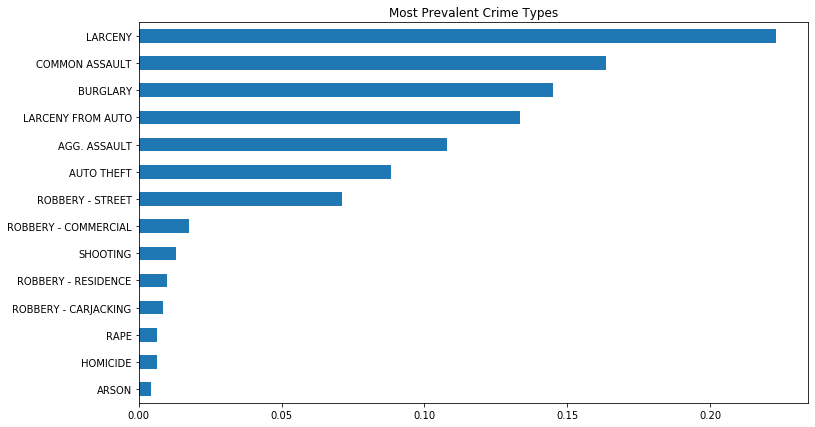

In [28]:
plot_kws= {'title':'Most Prevalent Crime Types','figsize':(12,7)}#,
df["Description"].value_counts(ascending=True,
                              normalize=True).plot(kind='barh',**plot_kws)

In [29]:
df['date'] = pd.to_datetime(df['CrimeDate'])
df.set_index('date',inplace=True)

In [30]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
date,,,,,,,,,,,,,,,,
2019-12-14,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1
2019-12-14,12/14/2019,07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1
2019-12-14,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2019-12-14,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1
2019-12-14,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1977-05-01,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1975-06-01,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1


## Getting Dummies of Crime Types for Counts

In [59]:
df_crimes = pd.get_dummies(df,columns=['Description'])

crime_cols = [col for col in df_crimes.columns if 'Description_' in col]
new_names = [x.replace('Description_','') for x in crime_cols]

rename_dict = dict(zip(crime_cols,new_names))
df_crimes.rename(rename_dict,axis=1,inplace=True)

df_crimes

,CrimeDate,CrimeTime,CrimeCode,Location,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,...,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
date,,,,,,,,,,,,,,,,,,,,,
2019-12-14,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,...,0,1,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,07:30:00,3B,600 S MONROE ST,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,...,0,0,0,0,0,0,0,0,1,0
2019-12-14,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,...,0,0,0,0,0,0,0,1,0,0
2019-12-14,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,...,0,0,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,O,NaN,523,NORTHERN,ROSEBANK,-77.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01,01/01/1978,10:30:00,2A,1900 ARGONNE DR,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,...,0,0,0,0,1,0,0,0,0,0
1977-05-01,05/01/1977,00:01:00,2A,600 W 34TH ST,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,...,0,0,0,0,1,0,0,0,0,0
1975-06-01,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,...,0,0,0,0,1,0,0,0,0,0


___

In [60]:
keep_cols = ['CrimeDate','CrimeTime']
keep_cols.extend(new_names)

keep_cols

['CrimeDate',
 'CrimeTime',
 'AGG. ASSAULT',
 'ARSON',
 'AUTO THEFT',
 'BURGLARY',
 'COMMON ASSAULT',
 'HOMICIDE',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET',
 'SHOOTING']

In [63]:
df_crimes= df_crimes[keep_cols].loc["2014":]
display(df_crimes.index)


DatetimeIndex(['2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01',
               ...
               '1988-05-01', '1985-01-01', '1982-08-01', '1981-12-01',
               '1980-07-01', '1978-01-01', '1977-05-01', '1975-06-01',
               '1969-07-20', '1963-10-30'],
              dtype='datetime64[ns]', name='date', length=218, freq=None)

___

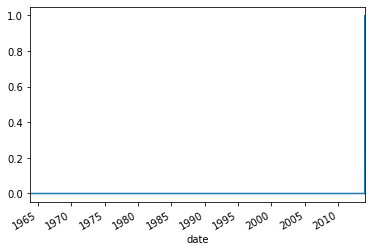

In [62]:
df_crimes['LARCENY'].plot()

## `pd.grouper`

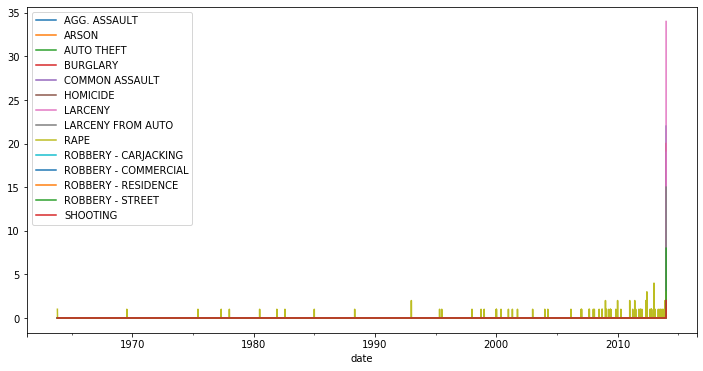

In [57]:
df_crimes.groupby(pd.Grouper(freq='D')).sum()[new_names].plot(figsize=(12,6)).autoscale()

In [46]:
df_crimes.index

DatetimeIndex(['2019-12-14', '2019-12-14', '2019-12-14', '2019-12-14',
               '2019-12-14', '2019-12-14', '2019-12-14', '2019-12-14',
               '2019-12-14', '2019-12-14',
               ...
               '1988-05-01', '1985-01-01', '1982-08-01', '1981-12-01',
               '1980-07-01', '1978-01-01', '1977-05-01', '1975-06-01',
               '1969-07-20', '1963-10-30'],
              dtype='datetime64[ns]', name='date', length=286609, freq=None)

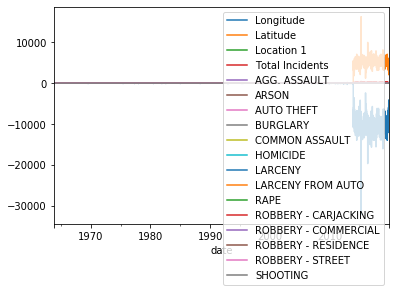

In [47]:
df_crimes.groupby(pd.Grouper(freq='D')).sum().plot()

In [ ]:
df_crimes['BURGLARY'].resample('D').sum().plot()
df_crimes['SHOOTING'].resample('D').sum().plot()
df_crimes['HOMICIDE'].resample('D').sum().plot()


In [ ]:
df_counts = df_crimes.groupby('CrimeDate').count()[new_names]
df_counts.index = pd.to_datetime(df_counts.index)
df_counts['BURGLARY'].plot()

In [ ]:
df_counts.sort_index(inplace=True)

In [ ]:
# df_counts.loc['2014':].plot()
# plt.legend(None)
df_2015 = df_counts.loc['2015':'2016']
ax = df_2015.plot()
fig=ax.get_figure()

In [ ]:
riots_start ='2015-04-18' 
ax.axvline(riots_start)

riots_end = '2015-05-03' 
ax.axvline(riots_end)

ax.set_xlim(riots_start,riots_end)

In [ ]:
df_2015.idxmax()

# Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df_2015).plot();

In [ ]:
# url = "https://en.wikipedia.org/wiki/2015_Baltimore_protests"
# pre_riot = crime_2014.loc['2015':'2016']
# pre_riot